In [1]:
# Analysis of OMSX30 for master thesis 
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import math
import scipy.stats as scs
# get only the adjusted closing prices
OMXS30 = yf.Ticker('^OMX').history(period="1d",start="2019-01-01", end="2023-05-01")['Close']
print(OMXS30)
OMXS30_data = pd.DataFrame(OMXS30)
OMXS30_data.reset_index() # reset the index
OMXS30_data.index[777]

Date
2019-01-02 00:00:00+01:00    1405.849976
2019-01-03 00:00:00+01:00    1393.520020
2019-01-04 00:00:00+01:00    1435.290039
2019-01-07 00:00:00+01:00    1439.930054
2019-01-08 00:00:00+01:00    1457.469971
                                ...     
2023-04-24 00:00:00+02:00    2259.820068
2023-04-25 00:00:00+02:00    2249.199951
2023-04-26 00:00:00+02:00    2240.080078
2023-04-27 00:00:00+02:00    2271.100098
2023-04-28 00:00:00+02:00    2270.580078
Name: Close, Length: 1086, dtype: float64


Timestamp('2022-02-09 00:00:00+0100', tz='Europe/Stockholm')

In [2]:
OMXS30_data['LogReturns'] = np.log(OMXS30_data / OMXS30_data.shift(1))
OMXS30_data
OMXS30_data = OMXS30_data.reset_index()
OMXS30_data.dropna()

,Date,Close,LogReturns
1,2019-01-03 00:00:00+01:00,1393.520020,-0.008809
2,2019-01-04 00:00:00+01:00,1435.290039,0.029534
3,2019-01-07 00:00:00+01:00,1439.930054,0.003228
4,2019-01-08 00:00:00+01:00,1457.469971,0.012107
5,2019-01-09 00:00:00+01:00,1470.510010,0.008907
...,...,...,...
1081,2023-04-24 00:00:00+02:00,2259.820068,0.005952
1082,2023-04-25 00:00:00+02:00,2249.199951,-0.004711
1083,2023-04-26 00:00:00+02:00,2240.080078,-0.004063
1084,2023-04-27 00:00:00+02:00,2271.100098,0.013753


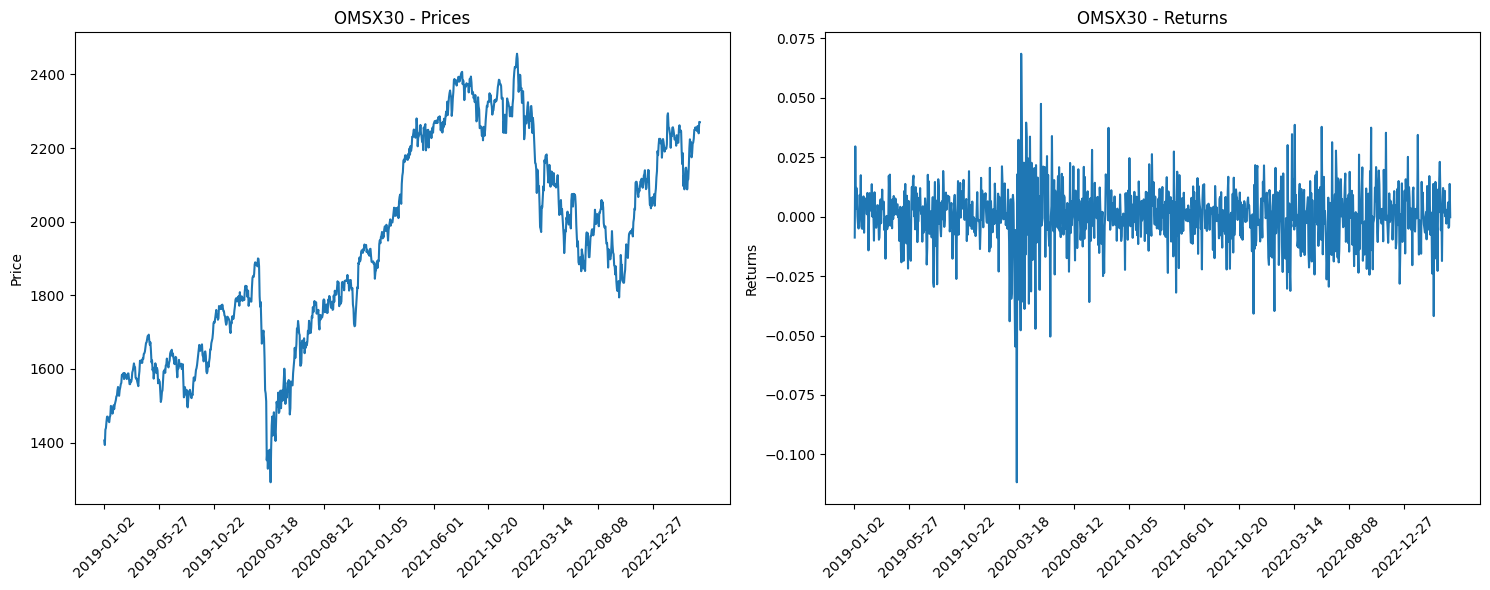

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # plot Close prices
# Plot OMXS30 prices
axes[0].set_title('OMSX30 - Prices')
axes[0].plot(OMXS30_data["Close"])
axes[0].set_ylabel('Price')
axes[0].set_xticks(OMXS30_data.index[::100])  # Set x-ticks every 100 data points
axes[0].set_xticklabels(OMXS30_data['Date'].dt.strftime('%Y-%m-%d').values[::100], rotation=45)  # Format and set x-tick labels


# Plot OMXS30 returns
axes[1].set_title('OMSX30 - Returns')
axes[1].plot(OMXS30_data['LogReturns'])
axes[1].set_ylabel('Returns')
axes[1].set_xticks(OMXS30_data.index[::100])  # Set x-ticks every 100 data points
axes[1].set_xticklabels(OMXS30_data['Date'].dt.strftime('%Y-%m-%d').values[::100], rotation=45)  # Format and set x-tick labels

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure
plt.savefig('prices_returns2.png')

# Display the figure
plt.show()

In [10]:
def print_statistics(data):
    returns = data['LogReturns'].dropna()
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Mean %9.6f" % np.mean(returns))
    print("Standard deviation %9.6f" % np.std(returns))
    print("Variance %9.6f" % np.var(returns))
    print("---------------------------------------------")
    print("Skewness %9.6f" % scs.skew(returns))
    print("---------------------------------------------")
    print("Kurtosis %9.6f" % scs.kurtosis(returns))
    print("---------------------------------------------")

In [11]:
print_statistics(OMXS30_data)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean  0.000442
Standard deviation  0.012950
Variance  0.000168
---------------------------------------------
Skewness -0.756605
---------------------------------------------
Kurtosis  6.940063
---------------------------------------------


Here the mean of annua is given by just multiplying byu the square root of the financial days = 252.
The same for the other anual values

0      -0.008809
1       0.029534
2       0.003228
3       0.012107
4       0.008907
          ...   
1080    0.005952
1081   -0.004711
1082   -0.004063
1083    0.013753
1084   -0.000229
Name: LogReturns, Length: 1085, dtype: float64
Iteration:      4,   Func. Count:     44,   Neg. LLF: 7.375985634505947e+17
Iteration:      8,   Func. Count:     98,   Neg. LLF: 9.292528229956488e+16
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3284.8522827371835
            Iterations: 13
            Function evaluations: 109
            Gradient evaluations: 9


C:\Users\nicko\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001677. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             LogReturns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3284.85
Distribution:                  Normal   AIC:                          -6561.70
Method:            Maximum Likelihood   BIC:                          -6541.75
                                        No. Observations:                 1085
Date:                Sat, May 20 2023   Df Residuals:                     1084
Time:                        23:55:07   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.5437e-04  1.022e-05     73.824      0.000 [7.

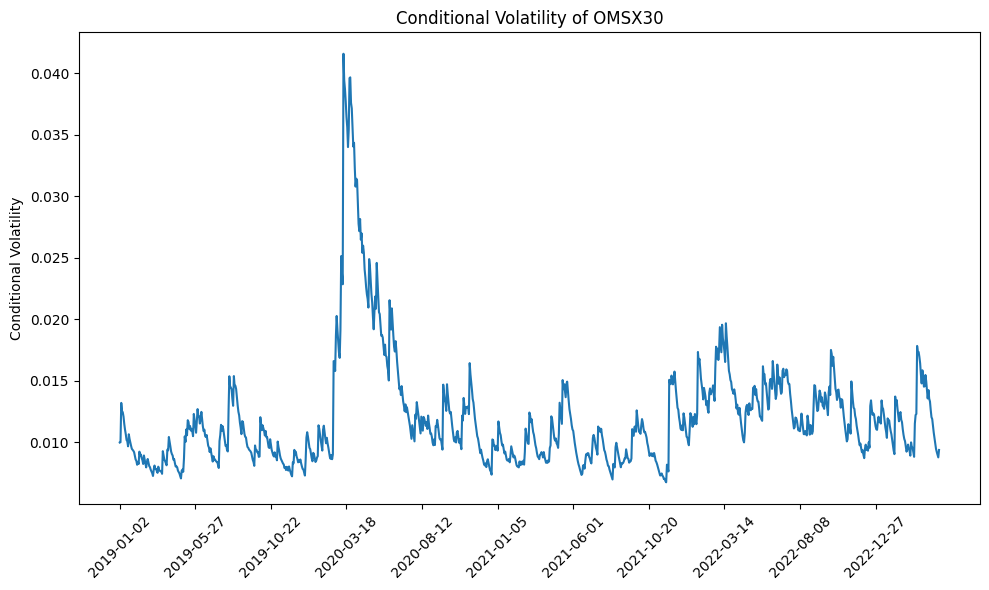

In [13]:
returns = OMXS30_data['LogReturns']
returns = returns.dropna()
returns.reset_index(drop=True, inplace=True)
print(returns)

GARCH = arch_model(returns, p=1, q=1, mean='constant', vol='GARCH', dist='normal')
model_fit = GARCH.fit(update_freq=4)

# Get the dates corresponding to the returns series
dates = OMXS30_data['Date'].loc[returns.index]

# Adjust figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot conditional volatility with dates
model_fit.conditional_volatility.plot(ax=ax, title="Conditional Volatility of OMSX30")
ax.set_ylabel('Conditional Volatility')
ax.set_xticks(range(len(dates)))
ax.set_xticklabels(dates, rotation=45)
ax.set_xticks(OMXS30_data.index[::100])  # Set x-ticks every 100 data points
ax.set_xticklabels(OMXS30_data['Date'].dt.strftime('%Y-%m-%d').values[::100], rotation=45)  # Format and set x-tick labels

# Adjust spacing between subplots
plt.tight_layout()

print(model_fit.summary())

# Save the figure
# plt.savefig('GARCH_OMSX302.png')
plt.savefig('conditional_volatility2.png')

# Show the plot
plt.show()


As we can see the Conditional Volatility is quite high in the periods that they seem the most impactful in Sweden which is also technically the beginning of the pandemic. In the period of 2020/02 to 2020/05, a peak of the conditional volatility is shown which indicates the potential problem that the pandemic caused to OMXS30 and the economy in general. The GARCH model's conditional volatility represents the estimated volatility at each point in time based on the model's parameters and past information. If the conditional volatility exhibits a substantial increase during a specific period, it indicates that the market experienced higher fluctuations and uncertainty during that time. Noteworthy is that a lot of countries saw a significant increase in risk in the beginning of the pandemic. This ensures that the conditional volatility follows a similar pattern which corresponds to a shock in the returns of the early months of the pandemic. According to "The first eight months of Sweden’s COVID‐19 strategy and the key actions and actors that were involved", Sweden imposed some sort of regulations like: to avoid unecessary visits to healthcare and elderly care, to stay home if sick, to work by distance, etc. Consequently, the volatility starts to follow a decreasing pattern due to both these regulations and initiliazation of vaccines which means that the economy tries to adjust to former levels thus the curve starts to flatten. Additionally, in https://sweden.se/life/society/sweden-and-corona-in-brief is described that the regulations and most of the of the general advice was withdrawn on the 9th of February 2022. It is possible to see some sort of increase in the conditional volatility again but it seems like that the levels are slightly reverted afterwards.

In [20]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [21]:
result = adfuller(returns)
adf_statistic = result[0]
p_value = result[1]
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)

# Check the critical values
critical_values = result[4]
for key, value in critical_values.items():
    print('Critical Value ({}) : {}'.format(key, value))

ADF Statistic: -7.888786858544024
p-value: 4.494508144020867e-12
Critical Value (1%) : -3.436510851955201
Critical Value (5%) : -2.864260220574562
Critical Value (10%) : -2.5682183458999943


Thus we notice that our financial data are indeed stationary meaning that there is an ARCH effect present in the residuals of the return series. 